This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)


BALANCE : Balance amount left in their account to make purchases (


BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)


PURCHASES : Amount of purchases made from account


ONEOFFPURCHASES : Maximum purchase amount done in one-go


INSTALLMENTSPURCHASES : Amount of purchase done in installment


CASHADVANCE : Cash in advance given by the user


PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)


ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)


PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)


CASHADVANCEFREQUENCY : How frequently the cash in advance being paid


CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"


PURCHASESTRX : Numbe of purchase transactions made


CREDITLIMIT : Limit of Credit Card for user


PAYMENTS : Amount of Payment done by user


MINIMUM_PAYMENTS : Minimum amount of payments made by user


PRCFULLPAYMENT : Percent of full payment paid by user


TENURE : Tenure of credit card service for user

In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px

In [3]:
data = pd.read_csv('/Users/Ladi/Desktop/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Detecting Outliers using the InterQuartile Range (IQR) Technique

K-means Clustering is very sensitive to outliers hence why we need to remove them

In [7]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [8]:
df = data.drop(['CUST_ID'], axis=1)
for column in df.columns:
    data = df[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


Replacing outliers with nan values 

In [9]:
for column in df.columns:
    data = df[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    df[column].loc[outliers] = np.nan
    
df.isnull().sum()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

Filling nan values with mean values 

In [10]:
df = df.fillna(df.mean())
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Normalizing the data

In [11]:
X = df.values[:,0:]
Clus_dataSet = pd.DataFrame(StandardScaler().fit_transform(X),columns=df.columns)
Clus_dataSet

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.920914,-2.610609e+00,-0.717855,-6.477389e-01,-0.388691,-6.161729e-01,-0.806490,-7.006888e-01,-0.707313,-0.733648,-0.668542,-0.727467,-1.055229,-0.951857,-7.963325e-01,-4.884012e-01,0.0
1,1.850586,-1.082644e+00,-0.871618,-6.477389e-01,-0.737921,-2.641488e-16,-1.221758,-7.006888e-01,-0.916995,1.113448,0.970691,-0.939117,0.954413,3.344316,1.659821e+00,2.703337e+00,0.0
2,1.230535,4.453216e-01,0.374553,1.677843e+00,-0.737921,-6.161729e-01,1.269843,1.041921e-14,-0.916995,-0.733648,-0.668542,0.330780,1.121883,-0.489047,4.879846e-01,-4.884012e-01,0.0
3,0.504272,1.772721e-13,1.544422,-1.538790e-15,-0.737921,-2.974103e-01,-1.014125,-2.537958e-01,-0.916995,-0.117952,-0.258734,-0.833292,1.121883,-1.174089,7.483468e-16,-4.884012e-01,0.0
4,-0.239942,4.453216e-01,-0.845829,-5.996133e-01,-0.737921,-6.161729e-01,-1.014125,-2.537958e-01,-0.916995,-0.733648,-0.668542,-0.833292,-0.988241,-0.427083,-5.191252e-01,-4.884012e-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.931790,4.453216e-01,-0.402400,-6.477389e-01,0.327781,-6.161729e-01,1.269843,-7.006888e-01,1.179833,-0.733648,-0.668542,-0.304168,-1.055229,-0.815533,-1.034945e+00,2.192568e-15,0.0
8946,-0.939952,4.453216e-01,-0.388087,-6.477389e-01,0.360288,-6.161729e-01,1.269843,-7.006888e-01,1.179833,-0.733648,-0.668542,-0.304168,-1.055229,-0.870301,7.483468e-16,-4.884012e-01,0.0
8947,-0.936257,-2.355956e+00,-0.638878,-6.477389e-01,-0.209317,-6.161729e-01,0.854576,-7.006888e-01,0.760469,-0.733648,-0.668542,-0.409993,-1.055229,-1.084591,-9.466548e-01,3.102308e+00,0.0
8948,-0.944971,-2.355956e+00,-0.871618,-6.477389e-01,-0.737921,-5.595439e-01,-1.221758,-7.006888e-01,-0.916995,0.497752,0.151075,-0.939117,-1.222699,-1.116219,-1.016858e+00,3.102308e+00,0.0


### Applying Dimension Reduction (PCA) to the dataset

Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a mch larger set while still preserving as much variance as possible. Essentially, it aims to reduce the number of features in a dataset which in turn reduces the noise and improves the performance of the algorithm

Finding optimal number of components

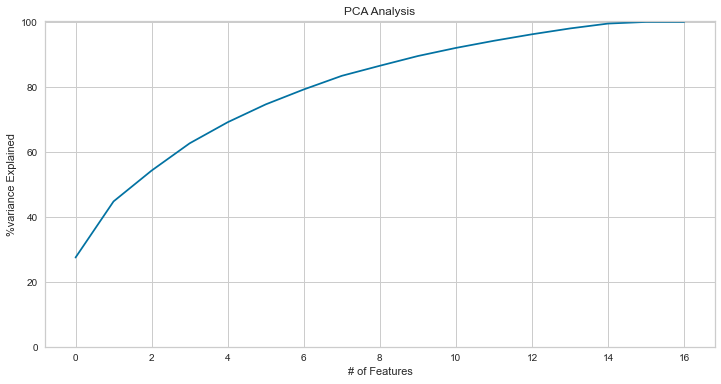

In [12]:
pca = PCA(n_components=17)
pca.fit(Clus_dataSet)
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(variance,3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('%variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)

plt.plot(var)

Generally, we want the explained variance to be >80%. I decided to with 90% which is about 9 components  

In [13]:
pca = PCA(n_components=9)
pca_scale = pca.fit_transform(Clus_dataSet)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])
pca_df_scale.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-0.988733,-2.916498,0.594151,0.346612,-0.050573,2.218733,-0.121530,-0.509587,-0.071468
1,-2.415325,2.076539,0.205150,1.770847,3.880576,-0.293747,1.407161,-1.591320,-0.470571
2,0.832140,0.912097,1.373991,-1.835419,0.272713,0.058382,0.304019,0.668833,-0.259692
3,-0.821271,-0.005660,1.157562,-1.112621,0.253844,0.389868,-0.328627,0.872662,-1.163081
4,-1.296222,-1.883222,0.543101,-1.030663,-0.260381,-0.460223,-0.012440,-0.647727,0.162149


Checking component importance 

In [14]:
print(pca.explained_variance_ratio_)

[0.27462864 0.17267633 0.09543462 0.08410833 0.0646992  0.05513585
 0.0460357  0.04157685 0.03101498]


We can see that component 1 and 2 clearly expalin more variance than the others 

Feature importance

In [15]:
print(abs(pca.components_))

[[0.12964446 0.00451474 0.34250837 0.2049967  0.32059458 0.23280191
  0.41647259 0.21394912 0.36222065 0.27242136 0.2599259  0.37891255
  0.05060393 0.09092764 0.11279669 0.08677536 0.        ]
 [0.42312811 0.14255104 0.21209079 0.22254762 0.06621067 0.27998826
  0.08475557 0.24123499 0.03514348 0.32225227 0.30978737 0.16053166
  0.27957581 0.29721235 0.39146542 0.10683423 0.        ]
 [0.08873212 0.15857704 0.16129019 0.51186803 0.37690104 0.1256996
  0.22529024 0.44675936 0.43407003 0.13304505 0.14299313 0.07575115
  0.10916596 0.08254584 0.13614462 0.03439043 0.        ]
 [0.30270878 0.37704765 0.07607881 0.01814734 0.07976212 0.31927183
  0.0290369  0.01259068 0.03846813 0.29932942 0.32567329 0.05397655
  0.1289944  0.25480252 0.33578202 0.50637841 0.        ]
 [0.11426351 0.17667419 0.11397424 0.23215944 0.01949065 0.16679154
  0.06085557 0.20173231 0.01475633 0.18306971 0.23275891 0.13836214
  0.59678138 0.41986965 0.14982169 0.39281699 0.        ]
 [0.15423472 0.8724786  0.01793

Finding the optimal number of clusters using the elbow method 

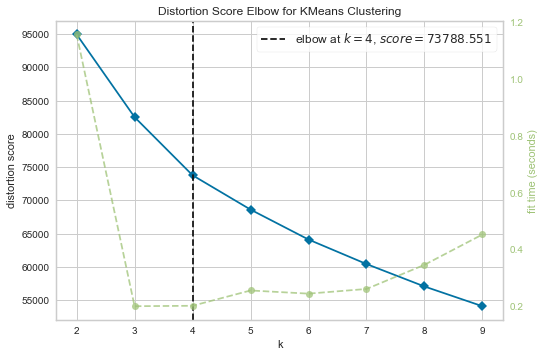

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
pca_model = KMeans()
visualizer = KElbowVisualizer(pca_model, k=(2,10))

visualizer.fit(pca_df_scale)
visualizer.show()

we can see that the optimal value for k=4

In [17]:
clusterNum = 4
k_means_pca = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_pca.fit(pca_df_scale)
labels = k_means_pca.labels_
print(labels)

[2 1 3 ... 0 2 3]


In [18]:
df['label']= labels
Clus_dataSet['label']=labels
pca_df_scale['label']=labels

Let's see how many people we have in each cluster 

<AxesSubplot:ylabel='label'>

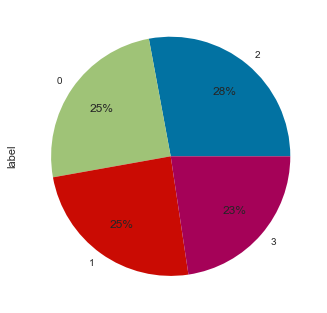

In [19]:
pca_df_scale.label.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [20]:
print(f'Silhouette Score:', silhouette_score(pca_df_scale,labels))

Silhouette Score: 0.23613454123092475


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


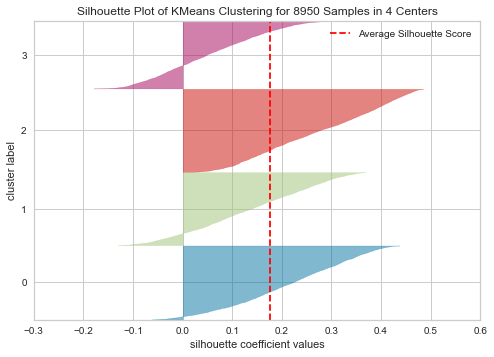

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(k_means_pca, colors='yellowbrick')
visualizer.fit(pca_df_scale.drop(['label'],axis=1))
visualizer.show()

We can see that the silhouette score for each cluster is above the average silhouette score(red dotted line) therefore we are good to go.

### Visualizing clusters with respect to the first two components 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


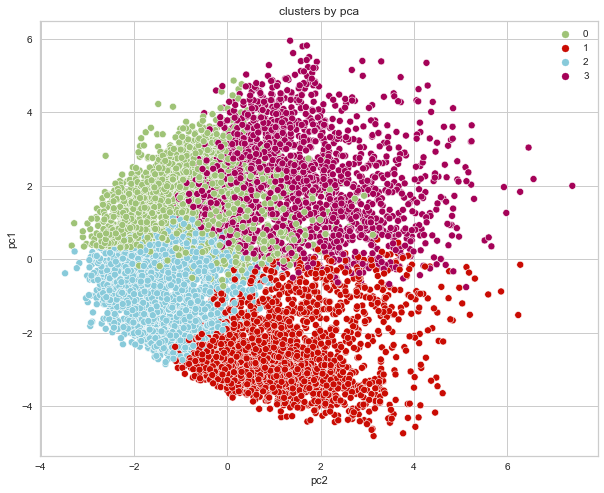

In [22]:
x_axis = pca_df_scale['pc2']
y_axis = pca_df_scale['pc1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = labels, palette = ['g','r','c','m'])
plt.title('clusters by pca')
plt.show()

We can now clearly observe the different clusters. we can now analyze them with respect to the features. 

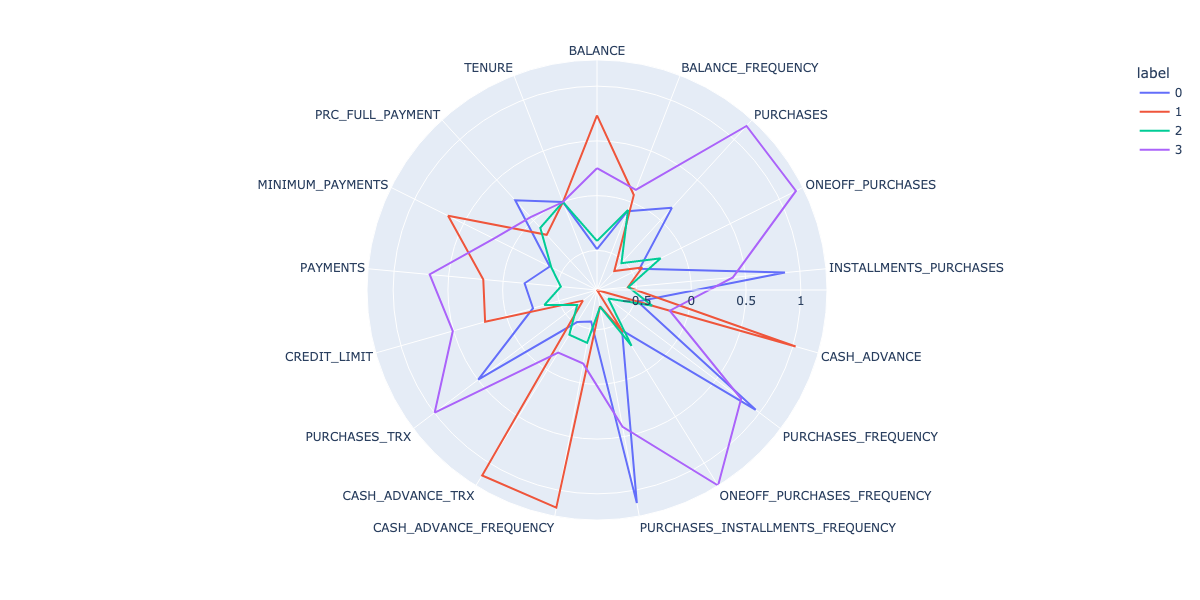

In [23]:
polar=Clus_dataSet.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=600,width=1200)
fig.show("png")

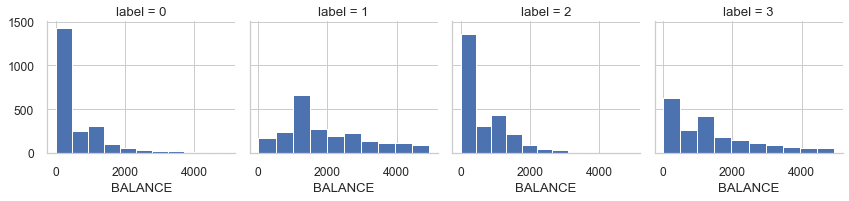

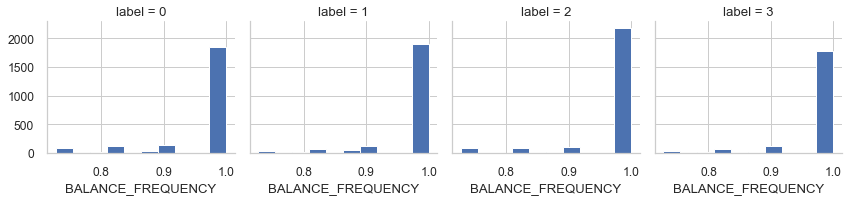

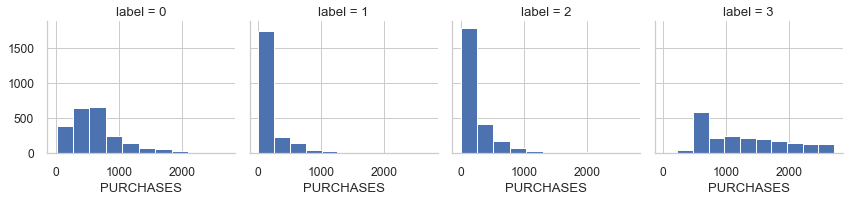

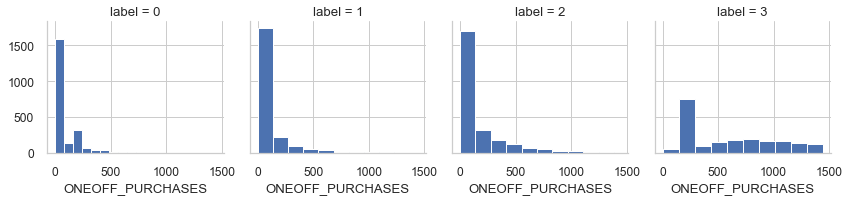

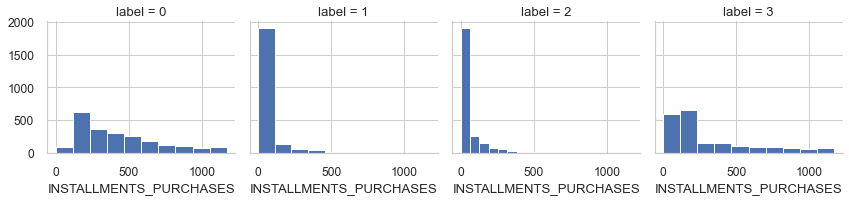

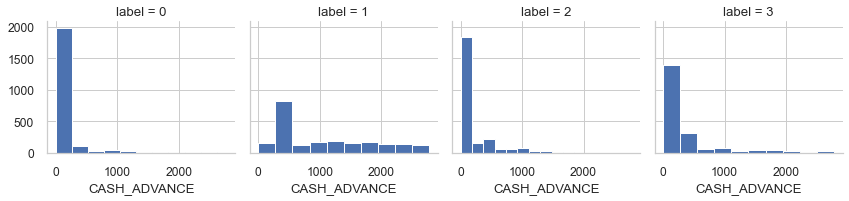

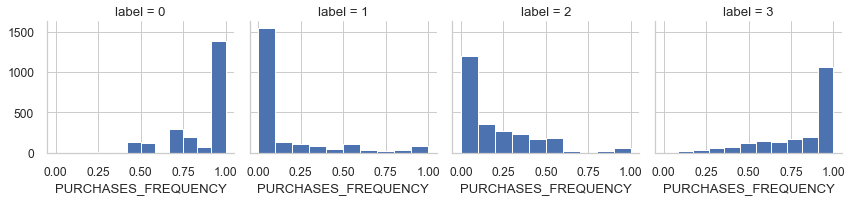

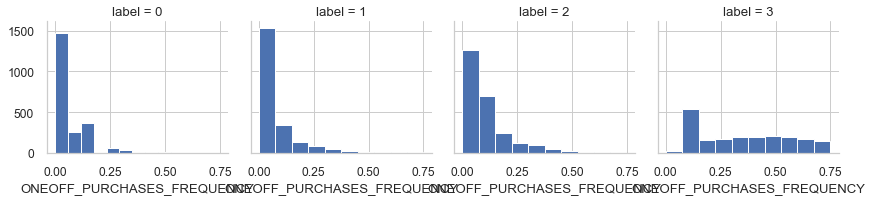

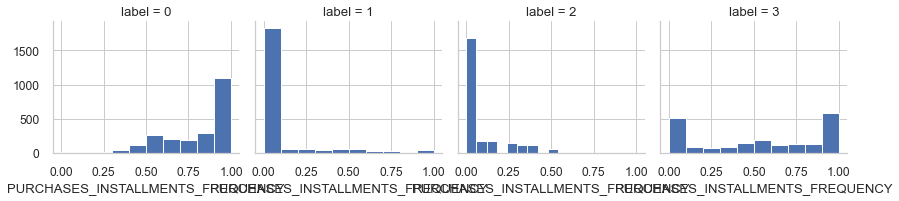

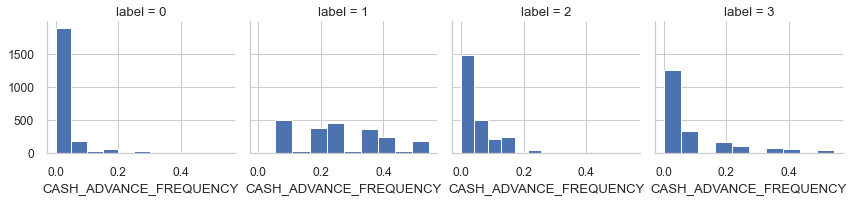

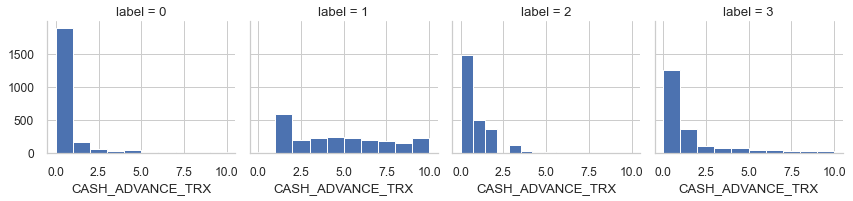

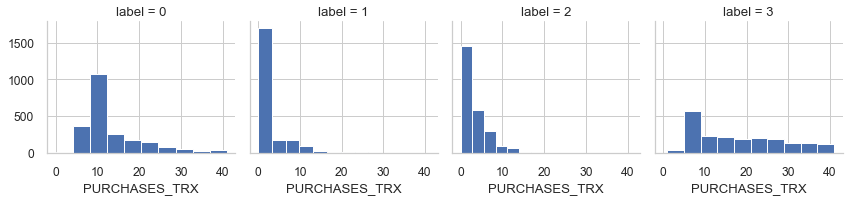

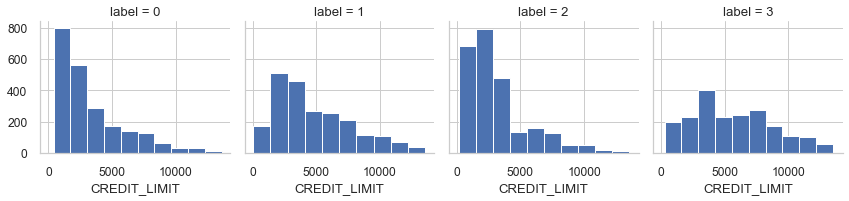

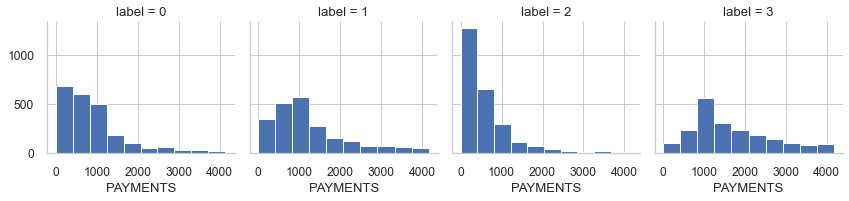

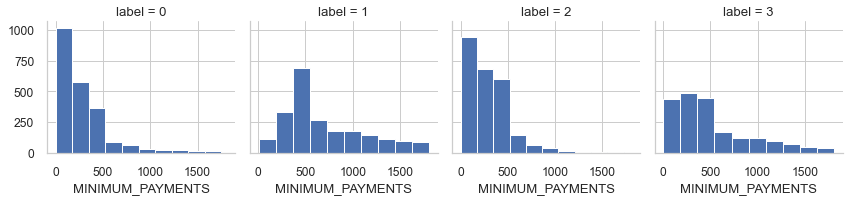

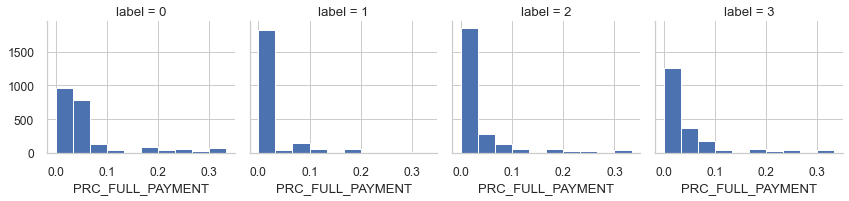

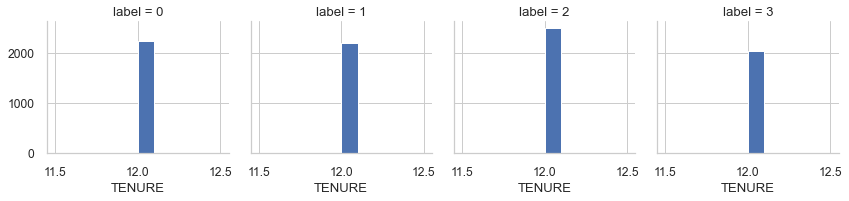

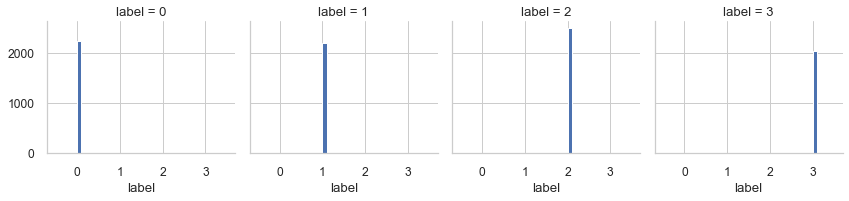

In [24]:
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize':[8,5]})

for c in df:
    grid = sns.FacetGrid(df, col='label')
    grid.map(plt.hist, c)

Label 0 represents customers with the least amount of money (they have the lowest balance) but this does not stop them from spending as they have the second highest number of purchases and have the highest purchase frequency. This is due to the fact the they pay in installments (highest number of installments purchases and highest purchase installments frequency). This is also confirmed in the oneoff purchases section as they have the lowest number. 


Label 1 represents customers who have a lot of money (they have the highest) but do not like spending it. They are last in purchases, oneoff purchases, installments purchases, purchases frequency and purchases installments frequency. They have the highest cash advance, cash advance frequency and cash advance trx which means they'll rather make their purchases with cash. A cash advance allows you to use your credit card to get a short-term cash loan at a bank or ATM. They also have the highest minimum payments which confirms that they do not use their credit cards.


Label 2 represents customers who do not have a lot of money (they have the second lowest amount of money) and do not spend a lot. They are last or second to the last in all areas except oneoff purchases and oneoff purchases frequency. This might be because they save a lot in order to make purchases. 


Label 3 represents customers who have money and are not afraid to spend it. They have the highest number of purchases and also have the highest number of oneoff purchases. They sometimes also pay in installments as they also have the second highest number of installments purchases. No other group has a higher oneoff purchases frequency and they are only second to label 0 in purchases frequency. They also have the highest credit limit and have done the highest amount of payments. 
